## Data Preprocessing+ ingestion

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities

In [16]:
df=pd.read_excel('Friendship Network.xlsx')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     44 non-null     object
 1   Friends  44 non-null     object
dtypes: object(2)
memory usage: 832.0+ bytes


In [18]:
df.isnull().sum()   

Name       0
Friends    0
dtype: int64

In [19]:
df.head()


,Name,Friends
0,RUDRA MEHUL DUDHAT,"DEVANSHU SABHARWAL, KANISHK NANDESHWAR, SIDDHE..."
1,NANDYALA VAISHNAVI,"JOSHITHA BANGARU, KOLLATI DEVI CHANDRIKA, LANK..."
2,JOSHITHA BANGARU,"BADAGONI SRI SAHASRA, KOLLATI DEVI CHANDRIKA, ..."
3,VATSAL YADAV,"DEVANSHU SABHARWAL, KANISHK NANDESHWAR, RUDRA ..."
4,TANMAY JAISWAL,"SIDDHESH BANSAL, SUJAL SOM, KANADE SAISH SANTO..."


In [20]:
df.iloc[0]

Name                                      RUDRA MEHUL DUDHAT
Friends    DEVANSHU SABHARWAL, KANISHK NANDESHWAR, SIDDHE...
Name: 0, dtype: object

In [21]:
for index, row in df.iterrows():
    if df['Name'][index] in df['Friends'][index]:
        print(f"Self-loop found at index {index}: {df['Name'][index]} -> {df['Friends'][index]}")


Self-loop found at index 1: NANDYALA VAISHNAVI -> JOSHITHA BANGARU, KOLLATI DEVI CHANDRIKA, LANKA DEVI SATWIKA, NAMBURI VEDA AISHWARYA, NANDYALA VAISHNAVI, PANUGANTI VISHISHTA
Self-loop found at index 5: MAMIDI SASIDHARA VENKATA SAIRAMA -> ANGALAKUDURU VARSHITH, ARUSH RANJAN, BANOTU SANTHOSH, BUDIREDDI NANDAGOPAL, DHIRAVATH PREMCHARAN, MADHUR KANKANE, MAMIDI SASIDHARA VENKATA SAIRAMA, MANTHRI PRANAV RAM, PUSHPARAJ KAPSE, SIDDHESH BANSAL, THAMMANDRA SAKETH RAM, VATSAL YADAV, YELLAMPATI LUKESH, PULAK KUMAR SARKAR
Self-loop found at index 6: THAMMANDRA SAKETH RAM -> ANGALAKUDURU VARSHITH, ARUSH RANJAN, BANOTU SANTHOSH, BUDIREDDI NANDAGOPAL, DEVANSHU SABHARWAL, DHIRAVATH PREMCHARAN, MAMIDI SASIDHARA VENKATA SAIRAMA, MANTHRI PRANAV RAM, KAIF RAZA, MOGULURI SAI SIDDHARDHA, PUSHPARAJ KAPSE, SIKHARAM SATYA SRI HARSHA PHANI, THAMMANDRA SAKETH RAM, VATSAL YADAV, VEERAMALLU VARUN BABU, VIDIT SHRIMALI, YELLAMPATI LUKESH
Self-loop found at index 7: BADAGONI SRI SAHASRA -> ARUSH RANJAN, BADAGONI SRI

clearly we cant have people that are friends with themselves, so we clean these edges, also note the the student "Devanshu Sabhrawal" is in the dataset thrice

In [34]:
df.drop_duplicates(subset=['Name'], keep='first', inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     41 non-null     object
 1   Friends  41 non-null     object
dtypes: object(2)
memory usage: 984.0+ bytes


In [36]:

def clean_self_loops(row):
    student_name = str(row['Name']).strip()
    # Handle cases where 'Friends' might be empty or NaN
    if pd.isna(row['Friends']) or row['Friends'] == '':
        return row['Friends']
    
    friend_list = [f.strip() for f in str(row['Friends']).split(',')]
    clean_list = [f for f in friend_list if f != student_name]
    return ", ".join(clean_list)

df['Friends'] = df.apply(clean_self_loops, axis=1)



In [37]:

self_loop_count = 0
for index, row in df.iterrows():
    # We check if the name exists in the newly cleaned string
    if row['Name'] in str(row['Friends']):
        print(f" Warning: Possible self-loop still at index {index}")
        self_loop_count += 1

if self_loop_count == 0:
    print("Diagnostics Passed: No self-loops found.")

Diagnostics Passed: No self-loops found.


## Creating the Graph using nx

In [38]:
G=nx.Graph()
for _, row in df.iterrows():
    name=row['Name']
    friends=row['Friends'].split(',')

    for friend in friends:
        friend=friend.strip()
        if friend != '':
            G.add_edge(name, friend)


In [39]:
N = G.number_of_nodes()
E = G.number_of_edges()
print(f"Graph Created Successfully.")
print(f"Nodes (Students): {N}")
print(f"Edges (Friendships): {E}")
print(f"Average Degree: {2 * E / N:.2f}")

Graph Created Successfully.
Nodes (Students): 43
Edges (Friendships): 210
Average Degree: 9.77


In [40]:
isolates = list(nx.isolates(G))
if isolates:
    print(f"Isolated Students (No connections): {len(isolates)}")
    print(isolates)
else:
    print("Network is fully connected (No isolated students).")

Network is fully connected (No isolated students).


no outliers are present in the class as is consistent with the truth, that means every node has some indegree and outdegree


In [41]:
def show_top_nodes(metric_dict, name, n=5):
    sorted_nodes = sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    print(f"\n--- Top {n} by {name} ---")
    for rank, (node, score) in enumerate(sorted_nodes, 1):
        print(f"{rank}. {node}: {score:.4f}")


In [45]:
degree_cent = nx.degree_centrality(G)
show_top_nodes(degree_cent, "Degree Centrality (Most Popular)")


--- Top 5 by Degree Centrality (Most Popular) ---
1. ARUSH RANJAN: 0.5714
2. BANOTU SANTHOSH: 0.4048
3. SIDDHESH BANSAL: 0.3810
4. MANTHRI PRANAV RAM: 0.3810
5. THAMMANDRA SAKETH RAM: 0.3810


In [58]:
df[df['Friends'].str.contains("ARUSH RANJAN", na=False)]['Name']


5     MAMIDI SASIDHARA VENKATA SAIRAMA
6                THAMMANDRA SAKETH RAM
7                 BADAGONI SRI SAHASRA
12                        PRINCE HADKE
13                   SHUBHAM KUMAR JHA
15                KANADE SAISH SANTOSH
16                  KANISHK NANDESHWAR
17                             RAJNISH
18                      KUSHAL AGARWAL
19                     PUSHPARAJ KAPSE
22                  DEVANSHU SABHARWAL
23                  KARAN KUMAR PRASAD
24                    HARSHITA AGRAWAL
25                     SIDDHESH BANSAL
26                     BANOTU SANTHOSH
27                  DANGE POOJA SANJAY
28                  PULAK KUMAR SARKAR
30                      VIDIT SHRIMALI
31             MOGULURI SAI SIDDHARDHA
33                BUDIREDDI NANDAGOPAL
36     SIKHARAM SATYA SRI HARSHA PHANI
Name: Name, dtype: object

Degree Centrality (Popularity)
Definition: Measures the number of immediate connections. A score of 1.0 means knowing everyone; 0.0 means knowing no one.

Inference: ARUSH RANJAN is the most popular and is directly connected to ~57% of the students. The drop-off to the next student (BANOTU SANTHOSH, ~40%) confirms a centralized network structure rather than a distributed one.


In [44]:
between_cent = nx.betweenness_centrality(G)
show_top_nodes(between_cent, "Betweenness Centrality (Best Bridges)")


--- Top 5 by Betweenness Centrality (Best Bridges) ---
1. ARUSH RANJAN: 0.2056
2. SIDDHESH BANSAL: 0.0808
3. BANOTU SANTHOSH: 0.0716
4. THAMMANDRA SAKETH RAM: 0.0515
5. BADAGONI SRI SAHASRA: 0.0514


Definition: Measures how often a person lies on the shortest path between two others. High scorers are "Gatekeepers" who connect disparate groups.

Inference: While BANOTU is the 2nd most popular (Degree), SIDDHESH BANSAL beats him here. This implies SIDDHESH is a critical connector bridging different friend circles, whereas Banotu is deeply embedded in just one large group. BADAGONI SRI SAHASRA appears here despite lower popularity, indicating she is a key link to a smaller, niche group.

In [46]:
between_cent = nx.betweenness_centrality(G)
show_top_nodes(between_cent, "Betweenness Centrality (Best Bridges)")


--- Top 5 by Betweenness Centrality (Best Bridges) ---
1. ARUSH RANJAN: 0.2056
2. SIDDHESH BANSAL: 0.0808
3. BANOTU SANTHOSH: 0.0716
4. THAMMANDRA SAKETH RAM: 0.0515
5. BADAGONI SRI SAHASRA: 0.0514


Closeness Centrality (Information Speed)
Definition: Measures how few steps it takes to reach everyone else. High scorers can spread news (or gossip) the fastest.

Inference: ARUSH and BANOTU are positioned at the "geometric center" of the social graph. Information originating from them reaches the entire class with the fewest "hops."

In [59]:
density=nx.density(G)
density

0.23255813953488372

A score of 0.23 indicates that out of all possible friendship pairs in the class, about 23% actually exist. This is a realistic number for a classroom; it's not a "clique" where everyone knows everyone

In [60]:
if nx.is_connected(G):
    diameter=nx.diameter(G)
else:
    diameter="Graph is not connected"
diameter

4

The diameter is the "longest shortest path" across the network. A diameter of 4 means that even for the two students who are socially furthest apart, they are connected by a chain of at most 3 intermediaries (consistent with Small World Phenonmenon)

In [61]:
avg_clus=nx.average_clustering(G)
avg_clus

0.5881787641437911

This measures the "cliquishness" of the graph. A score of ~0.59 is quite high. It means that if Student A is friends with Student B and Student C, there is a 59% probability that B and C are also friends with each other

# 4. Community Detection
We use the **Greedy Modularity** algorithm to detect distinct social circles within the class.

In [63]:
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G))

print(f"Total Communities Detected: {len(communities)}")
community_stats = []
for i, comm in enumerate(communities):
    community_stats.append({
        'Community ID': i + 1,
        'Size': len(comm),
        'Members': list(comm)
    })

df_comm = pd.DataFrame(community_stats).sort_values('Size', ascending=False)
biggest = df_comm.iloc[0]
smallest = df_comm.iloc[-1]



Total Communities Detected: 3


In [ ]:
print(f"\n--- Community Insights ---")
print(f"Largest Group (ID {biggest['Community ID']}): {biggest['Size']} students")
print(f"Smallest Group (ID {smallest['Community ID']}): {smallest['Size']} students")



--- Community Insights ---
Largest Group (ID 1): 17 students
Smallest Group (ID 3): 11 students


In [66]:
print("\nTop 3 Largest Communities:")
print(df_comm[['Community ID', 'Size', 'Members']].head(3))


Top 3 Largest Communities:
   Community ID  Size                                            Members
0             1    17  [MADAN VISHWAKARMA, VATSAL YADAV, KANADE SAISH...
1             2    15  [BANOTU SANTHOSH, KAIF RAZA, PUSHPARAJ KAPSE, ...
2             3    11  [KOLLATI DEVI CHANDRIKA, LANKA DEVI SATWIKA, N...


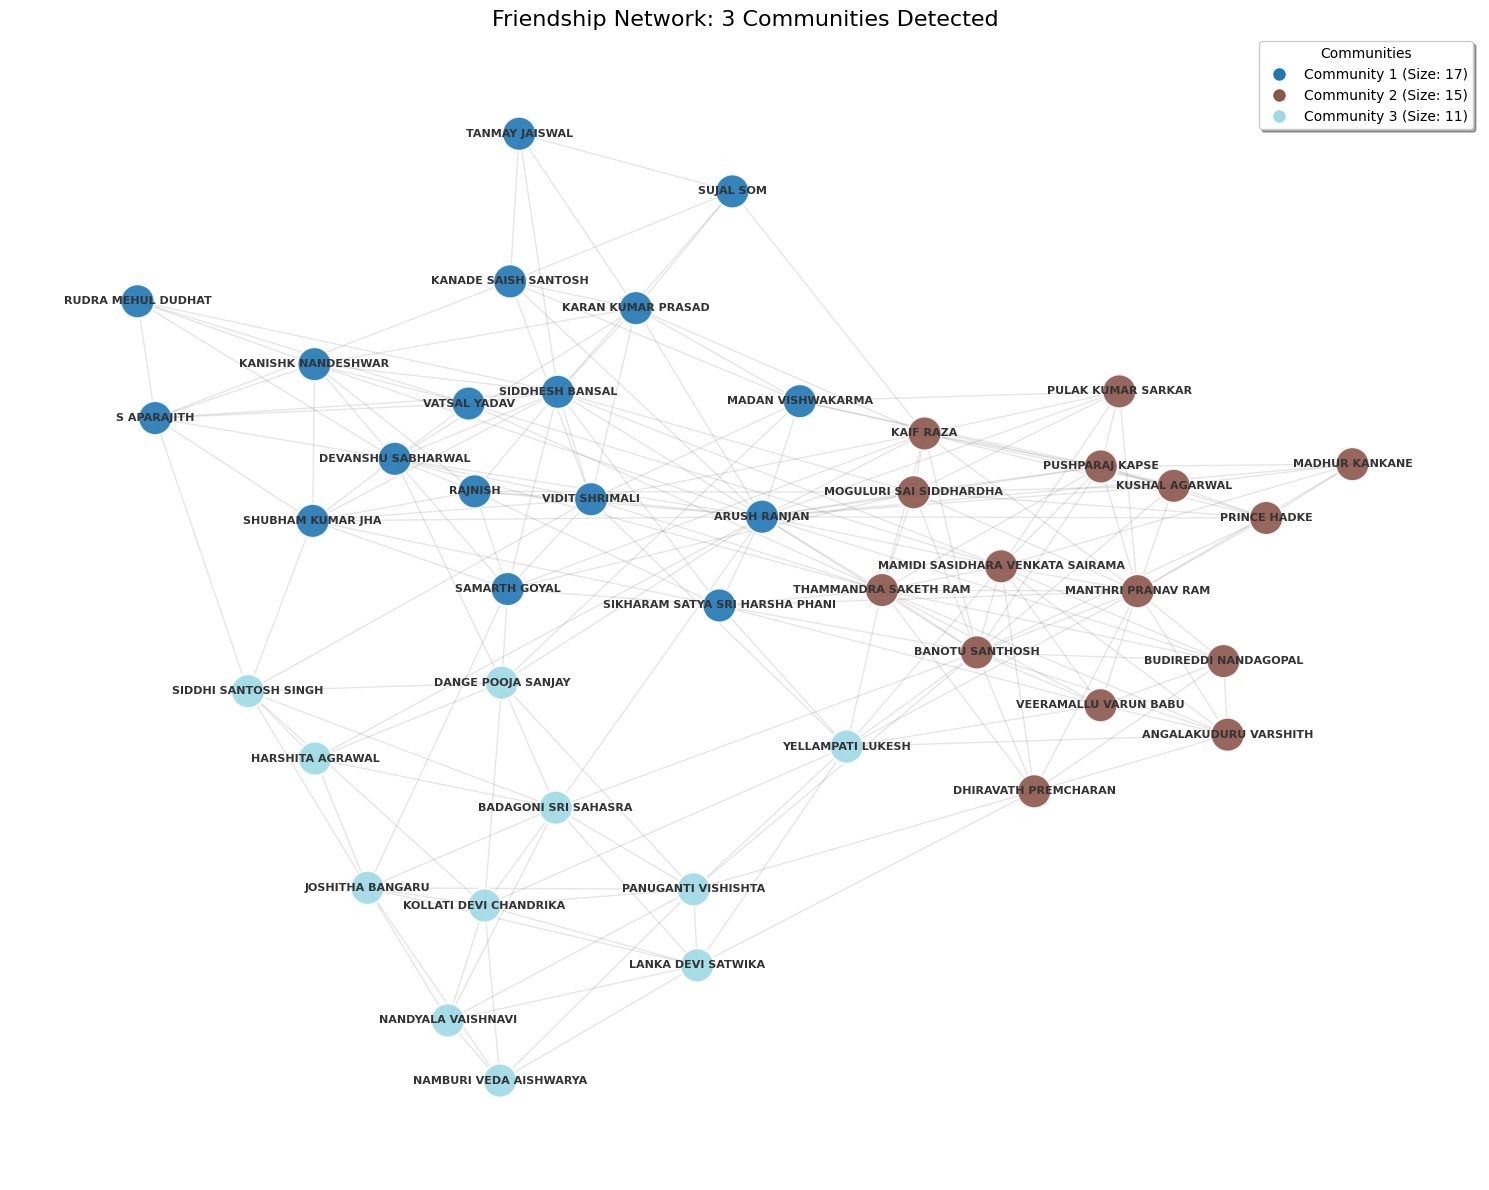

In [96]:

from matplotlib.lines import Line2D
plt.figure(figsize=(15, 12)) 
pos = nx.spring_layout(G, k=0.2, seed=42, iterations=50)
num_communities = len(communities)
colors = plt.cm.tab20(np.linspace(0, 1, num_communities))
community_color_map = {i: colors[i] for i in range(num_communities)}
node_colors = []
for node in G.nodes():
    for i, comm in enumerate(communities):
        if node in comm:
            node_colors.append(community_color_map[i])
            break
    else:
        node_colors.append('lightgray') 
nx.draw_networkx_edges(G, pos, alpha=0.2,  edge_color='gray', width=1)
nx.draw_networkx_nodes( G, pos, node_color=node_colors,node_size=600, alpha=0.9, edgecolors='white',linewidths=1.5)
nx.draw_networkx_labels( G, pos, font_size=8, font_weight="bold",font_color='#333333')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'Community {i+1} (Size: {len(comm)})',
           markerfacecolor=color, markersize=10)
    for i, (comm, color) in enumerate(zip(communities, colors))
]
plt.legend(handles=legend_elements, loc='upper right', title="Communities", frameon=True, shadow=True)
plt.title(f"Friendship Network: {num_communities} Communities Detected", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

 Clusters are not tight enough thus we apply girvan- newman to see if it performs better 

In [ ]:
from networkx.algorithms.community import girvan_newman
import itertools

print("Running Girvan-Newman Algorithm (Divisive Clustering)...")
comp = girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <=5, comp)
communities_gn = list(limited)[-1]
print(f"Communities Detected: {len(communities_gn)}")
gn_stats = []
for i, comm in enumerate(communities_gn):
    gn_stats.append({
        'Community ID': i + 1,
        'Size': len(comm),
        'Members': list(comm)
    })

df_gn = pd.DataFrame(gn_stats).sort_values('Size', ascending=False)

print(f"\n--- Girvan-Newman Insights ---")
print(f"Largest Group: {df_gn.iloc[0]['Size']} students")
print(f"Smallest Group: {df_gn.iloc[-1]['Size']} students")
print("\nCommunity Breakdown:")
print(df_gn[['Community ID', 'Size', 'Members']])

Running Girvan-Newman Algorithm (Divisive Clustering)...
Communities Detected: 5

--- Girvan-Newman Insights ---
Largest Group: 18 students
Smallest Group: 1 students

Community Breakdown:
   Community ID  Size                                            Members
3             4    18  [BANOTU SANTHOSH, KAIF RAZA, PUSHPARAJ KAPSE, ...
0             1    11  [SHUBHAM KUMAR JHA, VIDIT SHRIMALI, SIDDHESH B...
1             2    10  [KOLLATI DEVI CHANDRIKA, LANKA DEVI SATWIKA, N...
2             3     3  [KANADE SAISH SANTOSH, SUJAL SOM, TANMAY JAISWAL]
4             5     1                                [MADAN VISHWAKARMA]


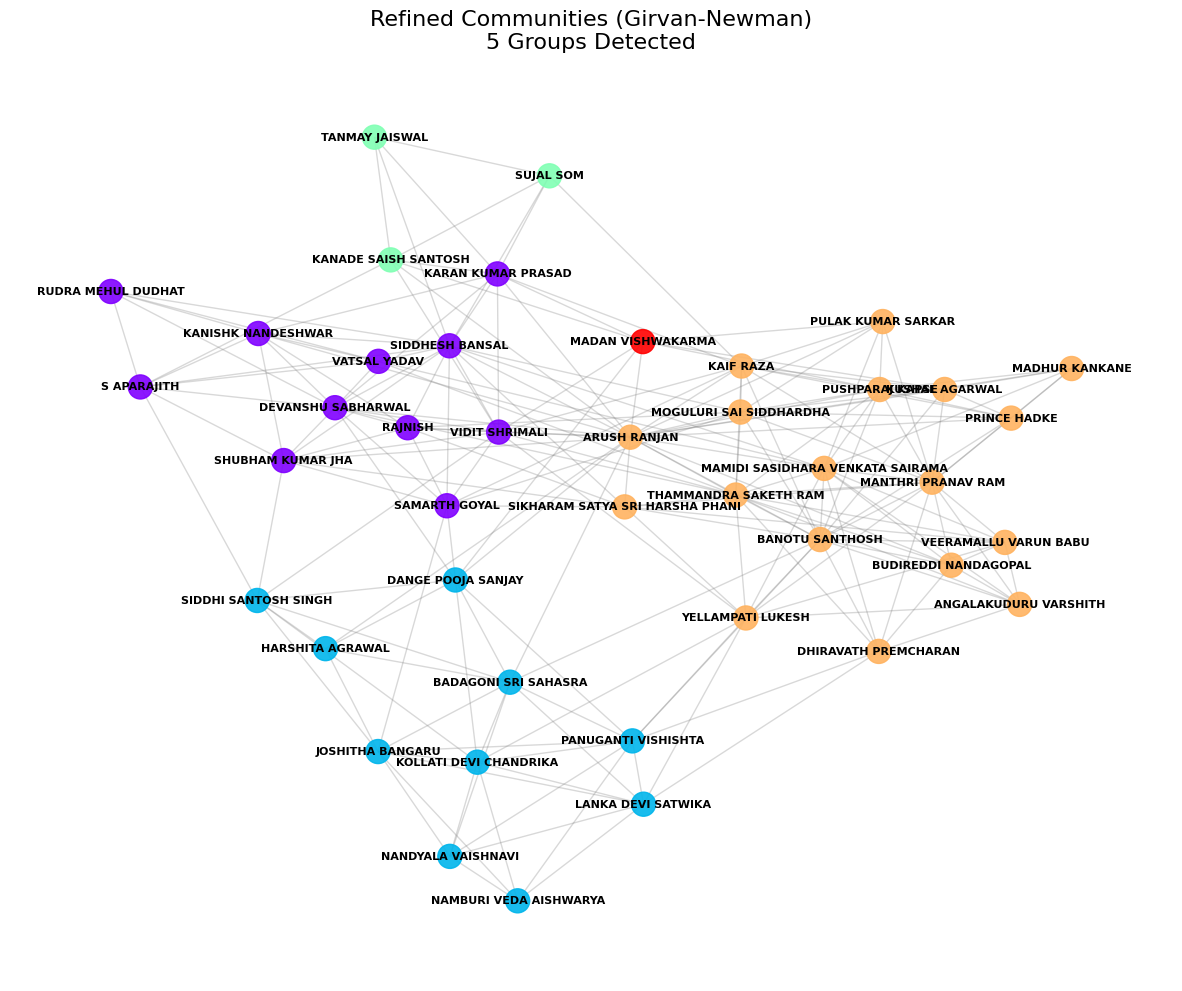

In [ ]:

plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, k=0.15, seed=42)
node_color_map = []
for node in G.nodes():
    for i, comm in enumerate(communities_gn):
        if node in comm:
            node_color_map.append(i)
            break
    if len(node_color_map) <= list(G.nodes()).index(node):
        node_color_map.append(0)
nx.draw_networkx_nodes(G, pos,node_color=node_color_map, node_size=300, cmap=plt.cm.rainbow, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")
plt.title(f"Refined Communities (Girvan-Newman)\n{len(communities_gn)} Groups Detected", fontsize=16)
plt.axis('off')
plt.show()

### **4. Community Analysis: Social Structures & Subgroups**

**Algorithm Used:** Girvan-Newman (Divisive Clustering)
**Insight:** The algorithm identified **5 distinct communities**, revealing that the class structure is driven by residence (Hostel wings), demographics (Region), and gender.

#### **Detailed Community Breakdown**

| **Color** | **Community** | **Composition** | **Social Insight** |
| :--- | :--- | :--- | :--- |
| <span style="color:orange">**Orange**</span> | **The "South" Cluster** | ~18 Students | This is the dominant group, mostly consisting of students hailing from **South India (Telugu speaking)**. Their shared language and cultural background form a strong, dense social backbone in the class. |
| <span style="color:purple">**Purple**</span> | **The "Hostel" Cluster** | ~11 Students | A geographically driven group. These students reside in the **C, D, and E-wings of Kanhar Hostel**. Their friendship is likely reinforced by living in close proximity and sharing daily living routines. |
| <span style="color:blue">**Blue**</span> | **The Female Cluster** | ~10 Students | A distinct, highly connected group consisting primarily of **female students**. This indicates a degree of gender homophily, where the female students have formed a supportive and cohesive circle separate from the larger male-dominated groups. |
| <span style="color:green">**Green**</span> | **The Triad** | 3 Students | A tight-knit triangle. This small group socializes **almost exclusively within itself**, interacting less with the larger clusters. Such triads are often formed by lab partners or close roommates. |
| <span style="color:red">**Red**</span> | **The Outlier** | *Madan Vishwakarma* | Identified as a community of one. This does not imply he has no friends, but rather that his connections act as "weak bridges" between the larger groups. The algorithm removed these bridges, highlighting his unique position between clusters rather than deep embedding in one. |



In [89]:
pagerank_scores = nx.pagerank(G, alpha=0.85)
df_pagerank = pd.DataFrame(list(pagerank_scores.items()), columns=['Student', 'Score'])
df_pagerank = df_pagerank.sort_values('Score', ascending=False).reset_index(drop=True)
print(" Top 5 Influencers (Highest PageRank)")
print(df_pagerank.head(5))
print("\nBottom 5 (Peripheral Nodes)")
print(df_pagerank.tail(5))


 Top 5 Influencers (Highest PageRank)
                 Student     Score
0           ARUSH RANJAN  0.051674
1        BANOTU SANTHOSH  0.036703
2        SIDDHESH BANSAL  0.036693
3     MANTHRI PRANAV RAM  0.034740
4  THAMMANDRA SAKETH RAM  0.034506

Bottom 5 (Peripheral Nodes)
                   Student     Score
38  NAMBURI VEDA AISHWARYA  0.014724
39               SUJAL SOM  0.014267
40        HARSHITA AGRAWAL  0.013999
41      RUDRA MEHUL DUDHAT  0.013784
42          TANMAY JAISWAL  0.012202


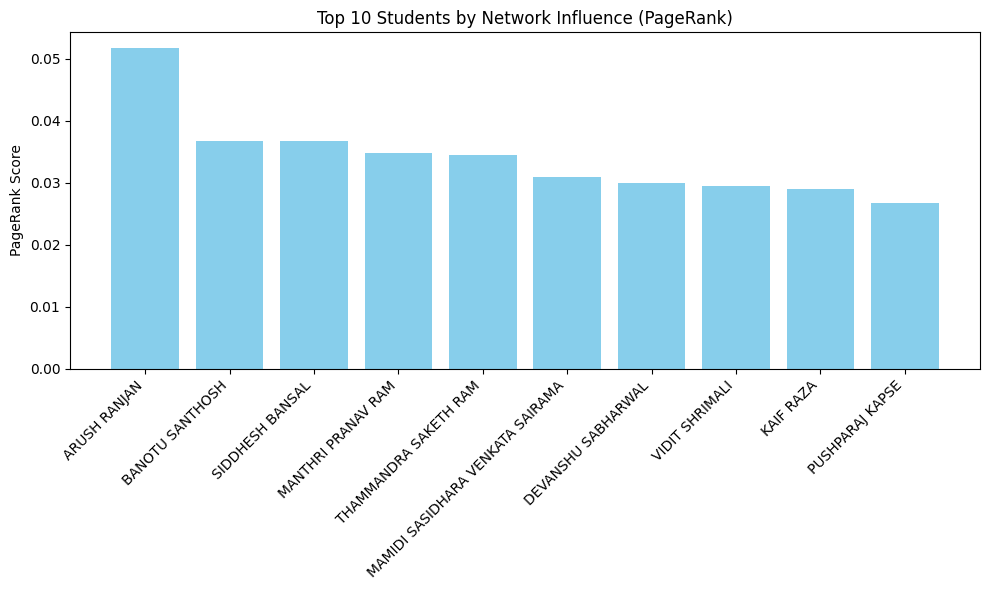

In [88]:

plt.figure(figsize=(10, 6))
plt.bar(df_pagerank['Student'][:10], df_pagerank['Score'][:10], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Students by Network Influence (PageRank)")
plt.ylabel("PageRank Score")
plt.tight_layout()
plt.show()

In [ ]:

pos = nx.spring_layout(G, k=0.2, seed=42)
node_to_community = {}
sorted_comms = sorted(communities_gn, key=len, reverse=True)
for i, comm in enumerate(sorted_comms):
    for node in comm:
        node_to_community[node] = i
internal_edges = []
bridge_edges = []
for u, v in G.edges():
    if node_to_community[u] != node_to_community[v]:
        bridge_edges.append((u, v))
    else:
        internal_edges.append((u, v))

print(f"Total Edges: {G.number_of_edges()}")
print(f"Internal Connections: {len(internal_edges)}")
print(f"Bridges (Cross-Group Links): {len(bridge_edges)}")


Total Edges: 210
Internal Connections: 154
Bridges (Cross-Group Links): 56


<Figure size 1500x1200 with 0 Axes>

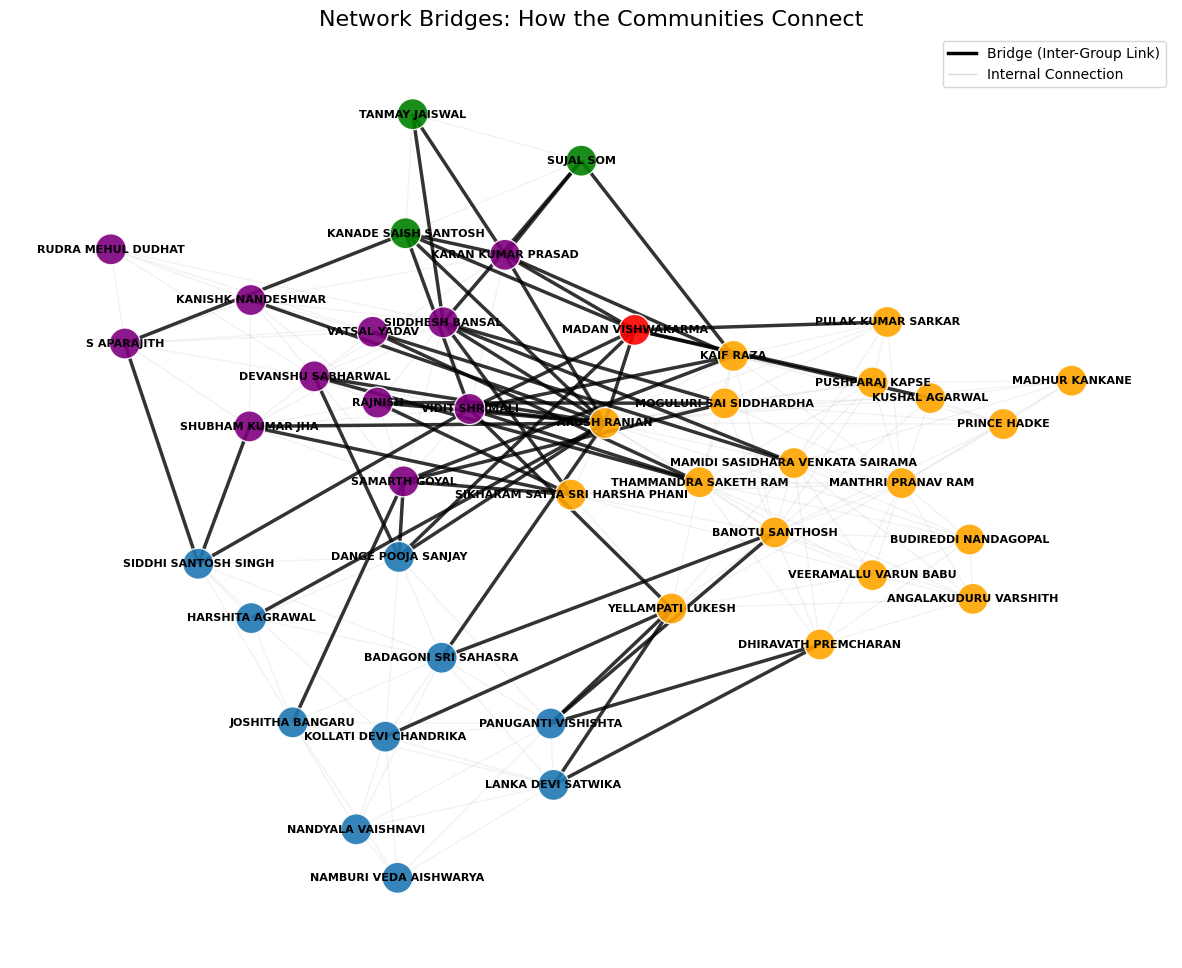

In [94]:
plt.figure(figsize=(15, 12))
color_palette = ['orange', 'purple', '#1f78b4', 'green', 'red']
node_colors = [color_palette[node_to_community[n]] if node_to_community[n] < len(color_palette) else 'gray' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.9, edgecolors='white')
nx.draw_networkx_edges(G, pos, edgelist=internal_edges, alpha=0.1, edge_color='gray', width=1)
nx.draw_networkx_edges(G, pos, edgelist=bridge_edges, alpha=0.8, edge_color='black', width=2.5, style='solid')
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")
plt.title("Network Bridges: How the Communities Connect", fontsize=16)
legend_elements = [Line2D([0], [0], color='black', lw=2.5, label='Bridge (Inter-Group Link)'), Line2D([0], [0], color='gray', lw=1, alpha=0.3, label='Internal Connection')]
plt.legend(handles=legend_elements, loc='upper right')
plt.axis('off')
plt.show()

### **Network Bridge Analysis**

| Student Name | Connectivity Function | Structural Significance |
| :--- | :--- | :--- |
| **Badagoni Sri Sahasra** | Connects the **Female Cluster** (Blue) to the **South Cluster** (Orange) through a direct link with Arush Ranjan. | Prevents the structural isolation of the Female Cluster, integrating it into the broader class network. |
| **Madan Vishwakarma** | Bridges the **Hostel Cluster** (Purple) and the **South Cluster** (Orange). | Acts as a structural bridge between two dominant subgroups (Residence-based and Region-based), facilitating cross-group interaction. |
| **Siddhesh Bansal** | Connects the isolated **Triad** (Green) to the rest of the network. | Serves as the sole external link for a small, otherwise closed group, preventing their complete disconnection from the class graph. |
| **Arush Ranjan** | Connects the **Orange Cluster** (South), **Purple Cluster** (Hostel), and **Blue Cluster** (Female) via intermediate nodes. | Exhibits the highest Betweenness Centrality, functioning as the primary node for information flow across the multiple major communities. |

### **5. Limitations of the Analysis**

While the graph analysis provides valuable insights into the classroom's social structure, several limitations must be considered when interpreting the results:

**1. Algorithmic Rigidity (The "Overlapping Group" Problem)**
Community detection algorithms like *Girvan-Newman* force every student into a single, exclusive community. In reality, social lives are fluid, and students often belong to multiple intersecting circles. 
* **Specific Example:** A student residing in the **Kanhar Hostel (C/D/E wings)** who also hails from **South India** faces a classification conflict. They effectively belong to *both* the "Hostel Cluster" (Purple) and the "South Cluster" (Orange). The algorithm assigns them to whichever group they have *slightly* more connections with, potentially separating them from roommates or close neighbors who were assigned to the other cluster. This creates an artificial boundary between students who are actually in the same physical group.

**2. Self-Reporting Bias & Data Quality**
The network is built on survey data, which is subject to recall bias.
* **Issues Identified:** The raw dataset contained **self-loops** (students listing themselves) and **ghost nodes** (names not on the official roster). While these were computationally cleaned, they indicate potential inconsistencies in how students interpreted the "Friend" criteria. Some may list only close confidants, while others list casual acquaintances, creating uneven edge weights that the unweighted graph treats as identical. Example, Devanshu listed all of his classmates as friends, thus ballooning his influence.

**3. The "Bridge" vs. "Isolate" Misclassification**
Algorithms can misinterpret "Gatekeepers" as "Outliers."
* **Example:** *Madan Vishwakarma* was identified as a community of one. While the algorithm isolated him because his connections were "weak bridges" between larger clusters, this mathematically "lonely" position might actually represent a socially powerful role (high Betweenness Centrality) that the clustering algorithm failed to capture adequately.

**4. Temporal Staticity**
This graph represents a single snapshot in time. Student friendships are dynamic, especially in a semester system where project groups and lab partners change. The current adjacency matrix does not account for the temporal evolution or decay of these relationships.